# Keras

In [9]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images = train_images / 255.0
test_images = test_images / 225.0

In [12]:
def create_keras_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=3, kernel_size=5, padding='valid', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(strides=2))
    model.add(tf.keras.layers.Conv2D(filters=3, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    model.summary()
    return model

In [13]:
model = create_keras_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 3)         84        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 3)           0         
_________________________________________________________________
flatten (Flatten)            (None, 108)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10900     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
__________

In [14]:
checkpoint_path = "keras/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

In [15]:
history = model.fit(train_images, train_labels, validation_split=0.1, batch_size=64, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 234us/step - loss: 0.6410 - acc: 0.7710 - val_loss: 0.4775 - val_acc: 0.8258
Epoch 2/10
54000/54000 [==============================] - 11s 200us/step - loss: 0.4497 - acc: 0.8400 - val_loss: 0.4197 - val_acc: 0.8497
Epoch 3/10
54000/54000 [==============================] - 12s 218us/step - loss: 0.4056 - acc: 0.8529 - val_loss: 0.3992 - val_acc: 0.8582
Epoch 4/10
54000/54000 [==============================] - 12s 222us/step - loss: 0.3814 - acc: 0.8614 - val_loss: 0.3827 - val_acc: 0.8612
Epoch 5/10
54000/54000 [==============================] - 12s 227us/step - loss: 0.3617 - acc: 0.8689 - val_loss: 0.3779 - val_acc: 0.8593
Epoch 6/10
54000/54000 [==============================] - 12s 228us/step - loss: 0.3498 - acc: 0.8717 - val_loss: 0.3967 - val_acc: 0.8590
Epoch 7/10
54000/54000 [==============================] - 12s 229us/step - loss: 0.3380 - acc: 0.8749 - val_loss: 0.3

In [16]:
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('Test accuracy:', score[1])

Test accuracy: 0.8696


In [17]:
model.save_weights(filepath='k/')


Consider using a TensorFlow optimizer from `tf.train`.


In [23]:
model = create_keras_model()
loss, acc = model.evaluate(test_images, test_labels)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 3)         84        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 3)           0         
_________________________________________________________________
flatten (Flatten)            (None, 108)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10900     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
__________

In [26]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 1s 115us/step
Restored model, accuracy: 86.42%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


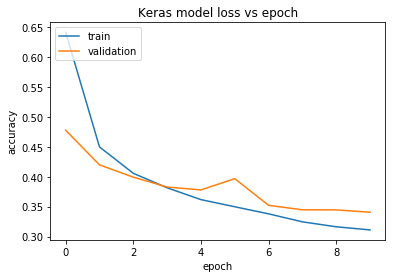

In [19]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Keras model loss vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# TensorFlow Low-Level API

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.tools import inspect_checkpoint as chkp

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0
test_images = test_images / 225.0

In [3]:
def conv2d(x, f, kernel, padding = 'valid'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.layers.conv2d(inputs = x, filters = f, kernel_size = kernel, strides=1, padding=padding, activation='relu')
    return x

def maxpool2d(x):
    # MaxPool2D wrapper
    return tf.layers.max_pooling2d(x, pool_size=2, strides=2)

def conv_net(features, labels, mode):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(features["x"], shape=[-1, 28, 28, 1])

    # Convolution Layer 5x5 filter, stride = 1, no padding
    
    conv1 = conv2d(x, f=3, kernel=5)
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1)

    # Convolution Layer 3x3 filter, stride = 1, with padding
    conv2 = conv2d(conv1, f=3, kernel=3)
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2)

    #Flatten
    flat = tf.layers.flatten(conv2)
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    # input size 108, output size 100
    fc1 = tf.layers.dense(flat, units=100, activation=tf.nn.relu)

    fc2 = tf.layers.dense(fc1, units=50, activation=tf.nn.relu)
    
    # Output, class prediction
    logits = tf.layers.dense(fc2, units=10)
    
    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=tf.estimator.ModeKeys.TRAIN, loss=loss, train_op=train_op)

    eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])
      }
    return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)
    

In [4]:
fashion_classifier = tf.estimator.Estimator(model_fn=conv_net, model_dir="fashion_classifier/")
tensors_to_log = {"probabilities": "softmax_tensor"}

logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_images},
    y=train_labels.astype('int32'),
    batch_size=3,
    num_epochs=12,
    shuffle=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'fashion_classifier/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002A5C36D04A8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [5]:
history = fashion_classifier.train(input_fn=train_input_fn)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into fashion_classifier/model.ckpt.
INFO:tensorflow:loss = 2.3048083782196045, step = 1
INFO:tensorflow:global_step/sec: 320.362
INFO:tensorflow:loss = 2.3643712997436523, step = 101 (0.313 sec)
INFO:tensorflow:global_step/sec: 354.256
INFO:tensorflow:loss = 2.293163537979126, step = 201 (0.282 sec)
INFO:tensorflow:global_step/sec: 372.755
INFO:tensorflow:loss = 2.2736356258392334, step = 301 (0.268 sec)
INFO:tensorflow:global_step/sec: 361.983
INFO:tensorflow:loss = 2

INFO:tensorflow:global_step/sec: 353.099
INFO:tensorflow:loss = 1.6956113576889038, step = 6401 (0.283 sec)
INFO:tensorflow:global_step/sec: 358.059
INFO:tensorflow:loss = 0.9621838927268982, step = 6501 (0.280 sec)
INFO:tensorflow:global_step/sec: 341.892
INFO:tensorflow:loss = 1.7684106826782227, step = 6601 (0.293 sec)
INFO:tensorflow:global_step/sec: 397.891
INFO:tensorflow:loss = 1.3758269548416138, step = 6701 (0.250 sec)
INFO:tensorflow:global_step/sec: 363.253
INFO:tensorflow:loss = 2.333104372024536, step = 6801 (0.275 sec)
INFO:tensorflow:global_step/sec: 333.117
INFO:tensorflow:loss = 0.6093752384185791, step = 6901 (0.300 sec)
INFO:tensorflow:global_step/sec: 355.557
INFO:tensorflow:loss = 1.6388288736343384, step = 7001 (0.281 sec)
INFO:tensorflow:global_step/sec: 375.535
INFO:tensorflow:loss = 1.750325083732605, step = 7101 (0.266 sec)
INFO:tensorflow:global_step/sec: 358.109
INFO:tensorflow:loss = 0.8010618090629578, step = 7201 (0.279 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 374.139
INFO:tensorflow:loss = 0.21929235756397247, step = 14001 (0.267 sec)
INFO:tensorflow:global_step/sec: 365.948
INFO:tensorflow:loss = 0.5392601490020752, step = 14101 (0.273 sec)
INFO:tensorflow:global_step/sec: 374.137
INFO:tensorflow:loss = 1.0282331705093384, step = 14201 (0.266 sec)
INFO:tensorflow:global_step/sec: 390.142
INFO:tensorflow:loss = 0.49950990080833435, step = 14301 (0.257 sec)
INFO:tensorflow:global_step/sec: 387.143
INFO:tensorflow:loss = 0.9655065536499023, step = 14401 (0.258 sec)
INFO:tensorflow:global_step/sec: 325.547
INFO:tensorflow:loss = 1.1294087171554565, step = 14501 (0.307 sec)
INFO:tensorflow:global_step/sec: 368.672
INFO:tensorflow:loss = 1.5493987798690796, step = 14601 (0.271 sec)
INFO:tensorflow:global_step/sec: 371.318
INFO:tensorflow:loss = 0.5620934367179871, step = 14701 (0.269 sec)
INFO:tensorflow:global_step/sec: 363.298
INFO:tensorflow:loss = 0.6154360175132751, step = 14801 (0.276 sec)
INFO:tensorflow:g

INFO:tensorflow:loss = 0.8671638369560242, step = 21501 (0.269 sec)
INFO:tensorflow:global_step/sec: 376.948
INFO:tensorflow:loss = 0.3269011676311493, step = 21601 (0.265 sec)
INFO:tensorflow:global_step/sec: 381.248
INFO:tensorflow:loss = 1.1139717102050781, step = 21701 (0.263 sec)
INFO:tensorflow:global_step/sec: 326.608
INFO:tensorflow:loss = 1.6283468008041382, step = 21801 (0.306 sec)
INFO:tensorflow:global_step/sec: 379.804
INFO:tensorflow:loss = 0.8365573883056641, step = 21901 (0.263 sec)
INFO:tensorflow:global_step/sec: 379.805
INFO:tensorflow:loss = 0.32958874106407166, step = 22001 (0.262 sec)
INFO:tensorflow:global_step/sec: 375.537
INFO:tensorflow:loss = 0.9012048840522766, step = 22101 (0.267 sec)
INFO:tensorflow:global_step/sec: 384.169
INFO:tensorflow:loss = 0.8221182227134705, step = 22201 (0.259 sec)
INFO:tensorflow:global_step/sec: 382.705
INFO:tensorflow:loss = 0.4990421235561371, step = 22301 (0.261 sec)
INFO:tensorflow:global_step/sec: 367.245
INFO:tensorflow:lo

INFO:tensorflow:loss = 0.3680189549922943, step = 29001 (0.256 sec)
INFO:tensorflow:global_step/sec: 376.949
INFO:tensorflow:loss = 1.0255260467529297, step = 29101 (0.265 sec)
INFO:tensorflow:global_step/sec: 376.948
INFO:tensorflow:loss = 0.2893562614917755, step = 29201 (0.265 sec)
INFO:tensorflow:global_step/sec: 342.213
INFO:tensorflow:loss = 0.2260061651468277, step = 29301 (0.292 sec)
INFO:tensorflow:global_step/sec: 359.381
INFO:tensorflow:loss = 0.5131997466087341, step = 29401 (0.278 sec)
INFO:tensorflow:global_step/sec: 390.198
INFO:tensorflow:loss = 0.11592219024896622, step = 29501 (0.256 sec)
INFO:tensorflow:global_step/sec: 359.348
INFO:tensorflow:loss = 0.33101019263267517, step = 29601 (0.278 sec)
INFO:tensorflow:global_step/sec: 358.078
INFO:tensorflow:loss = 0.26631593704223633, step = 29701 (0.279 sec)
INFO:tensorflow:global_step/sec: 363.31
INFO:tensorflow:loss = 0.4789625406265259, step = 29801 (0.275 sec)
INFO:tensorflow:global_step/sec: 378.371
INFO:tensorflow:l

INFO:tensorflow:global_step/sec: 317.305
INFO:tensorflow:loss = 0.8625032305717468, step = 36601 (0.316 sec)
INFO:tensorflow:global_step/sec: 343.385
INFO:tensorflow:loss = 0.22500477731227875, step = 36701 (0.291 sec)
INFO:tensorflow:global_step/sec: 369.994
INFO:tensorflow:loss = 0.19418925046920776, step = 36801 (0.269 sec)
INFO:tensorflow:global_step/sec: 381.214
INFO:tensorflow:loss = 0.19187970459461212, step = 36901 (0.263 sec)
INFO:tensorflow:global_step/sec: 360.708
INFO:tensorflow:loss = 0.10774914175271988, step = 37001 (0.275 sec)
INFO:tensorflow:global_step/sec: 358.102
INFO:tensorflow:loss = 0.14499928057193756, step = 37101 (0.280 sec)
INFO:tensorflow:global_step/sec: 359.384
INFO:tensorflow:loss = 0.011531560681760311, step = 37201 (0.279 sec)
INFO:tensorflow:global_step/sec: 374.136
INFO:tensorflow:loss = 0.13897527754306793, step = 37301 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.537
INFO:tensorflow:loss = 1.6473913192749023, step = 37401 (0.266 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 354.265
INFO:tensorflow:loss = 0.09152115136384964, step = 44101 (0.282 sec)
INFO:tensorflow:global_step/sec: 375.539
INFO:tensorflow:loss = 0.013970613479614258, step = 44201 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.581
INFO:tensorflow:loss = 0.6667991280555725, step = 44301 (0.266 sec)
INFO:tensorflow:global_step/sec: 342.174
INFO:tensorflow:loss = 0.9685795903205872, step = 44401 (0.324 sec)
INFO:tensorflow:global_step/sec: 300.205
INFO:tensorflow:loss = 0.7589693665504456, step = 44501 (0.302 sec)
INFO:tensorflow:global_step/sec: 353.097
INFO:tensorflow:loss = 0.19347728788852692, step = 44601 (0.283 sec)
INFO:tensorflow:global_step/sec: 342.214
INFO:tensorflow:loss = 0.11869063228368759, step = 44701 (0.292 sec)
INFO:tensorflow:global_step/sec: 359.385
INFO:tensorflow:loss = 0.034780655056238174, step = 44801 (0.277 sec)
INFO:tensorflow:global_step/sec: 364.613
INFO:tensorflow:loss = 0.20215773582458496, step = 44901 (0.275 sec)
INFO:tensor

INFO:tensorflow:loss = 0.41737130284309387, step = 51601 (0.261 sec)
INFO:tensorflow:global_step/sec: 355.527
INFO:tensorflow:loss = 1.1482963562011719, step = 51701 (0.281 sec)
INFO:tensorflow:global_step/sec: 372.74
INFO:tensorflow:loss = 0.08650067448616028, step = 51801 (0.268 sec)
INFO:tensorflow:global_step/sec: 387.139
INFO:tensorflow:loss = 0.23257708549499512, step = 51901 (0.258 sec)
INFO:tensorflow:global_step/sec: 382.702
INFO:tensorflow:loss = 0.47559523582458496, step = 52001 (0.261 sec)
INFO:tensorflow:global_step/sec: 384.169
INFO:tensorflow:loss = 0.5901805758476257, step = 52101 (0.260 sec)
INFO:tensorflow:global_step/sec: 344.601
INFO:tensorflow:loss = 0.043867796659469604, step = 52201 (0.289 sec)
INFO:tensorflow:global_step/sec: 365.904
INFO:tensorflow:loss = 0.4950505793094635, step = 52301 (0.274 sec)
INFO:tensorflow:global_step/sec: 382.704
INFO:tensorflow:loss = 0.07215771079063416, step = 52401 (0.261 sec)
INFO:tensorflow:global_step/sec: 384.213
INFO:tensorfl

INFO:tensorflow:global_step/sec: 368.634
INFO:tensorflow:loss = 1.8928437232971191, step = 59201 (0.271 sec)
INFO:tensorflow:global_step/sec: 360.677
INFO:tensorflow:loss = 1.5986124277114868, step = 59301 (0.277 sec)
INFO:tensorflow:global_step/sec: 355.525
INFO:tensorflow:loss = 0.44187232851982117, step = 59401 (0.281 sec)
INFO:tensorflow:global_step/sec: 367.279
INFO:tensorflow:loss = 1.3059674501419067, step = 59501 (0.272 sec)
INFO:tensorflow:global_step/sec: 387.131
INFO:tensorflow:loss = 0.8608660697937012, step = 59601 (0.258 sec)
INFO:tensorflow:global_step/sec: 376.959
INFO:tensorflow:loss = 0.1560358852148056, step = 59701 (0.265 sec)
INFO:tensorflow:global_step/sec: 369.987
INFO:tensorflow:loss = 0.25368496775627136, step = 59801 (0.270 sec)
INFO:tensorflow:global_step/sec: 349.368
INFO:tensorflow:loss = 0.5470840334892273, step = 59901 (0.286 sec)
INFO:tensorflow:global_step/sec: 360.719
INFO:tensorflow:loss = 0.6145698428153992, step = 60001 (0.277 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 367.278
INFO:tensorflow:loss = 0.017580358311533928, step = 66701 (0.273 sec)
INFO:tensorflow:global_step/sec: 358.101
INFO:tensorflow:loss = 0.15157751739025116, step = 66801 (0.278 sec)
INFO:tensorflow:global_step/sec: 379.803
INFO:tensorflow:loss = 0.01294290367513895, step = 66901 (0.263 sec)
INFO:tensorflow:global_step/sec: 365.988
INFO:tensorflow:loss = 1.5318762063980103, step = 67001 (0.273 sec)
INFO:tensorflow:global_step/sec: 432.131
INFO:tensorflow:loss = 0.11670563369989395, step = 67101 (0.231 sec)
INFO:tensorflow:global_step/sec: 435.957
INFO:tensorflow:loss = 0.0038995433133095503, step = 67201 (0.229 sec)
INFO:tensorflow:global_step/sec: 453.764
INFO:tensorflow:loss = 0.037937186658382416, step = 67301 (0.219 sec)
INFO:tensorflow:global_step/sec: 374.095
INFO:tensorflow:loss = 0.15009529888629913, step = 67401 (0.268 sec)
INFO:tensorflow:global_step/sec: 360.717
INFO:tensorflow:loss = 0.5176556706428528, step = 67501 (0.278 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 363.293
INFO:tensorflow:loss = 0.043028946965932846, step = 74201 (0.275 sec)
INFO:tensorflow:global_step/sec: 356.824
INFO:tensorflow:loss = 0.017950763925909996, step = 74301 (0.280 sec)
INFO:tensorflow:global_step/sec: 363.334
INFO:tensorflow:loss = 0.7706405520439148, step = 74401 (0.275 sec)
INFO:tensorflow:global_step/sec: 336.47
INFO:tensorflow:loss = 0.15123288333415985, step = 74501 (0.297 sec)
INFO:tensorflow:global_step/sec: 354.306
INFO:tensorflow:loss = 0.018060216680169106, step = 74601 (0.282 sec)
INFO:tensorflow:global_step/sec: 368.635
INFO:tensorflow:loss = 0.28782951831817627, step = 74701 (0.273 sec)
INFO:tensorflow:global_step/sec: 374.087
INFO:tensorflow:loss = 0.15889059007167816, step = 74801 (0.265 sec)
INFO:tensorflow:global_step/sec: 370.04
INFO:tensorflow:loss = 0.13994471728801727, step = 74901 (0.270 sec)
INFO:tensorflow:global_step/sec: 376.95
INFO:tensorflow:loss = 0.0353715606033802, step = 75001 (0.265 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 364.613
INFO:tensorflow:loss = 0.518032431602478, step = 81701 (0.274 sec)
INFO:tensorflow:global_step/sec: 360.641
INFO:tensorflow:loss = 0.3684046268463135, step = 81801 (0.277 sec)
INFO:tensorflow:global_step/sec: 379.794
INFO:tensorflow:loss = 0.039218999445438385, step = 81901 (0.263 sec)
INFO:tensorflow:global_step/sec: 372.795
INFO:tensorflow:loss = 1.2853821516036987, step = 82001 (0.268 sec)
INFO:tensorflow:global_step/sec: 354.304
INFO:tensorflow:loss = 0.48099157214164734, step = 82101 (0.282 sec)
INFO:tensorflow:global_step/sec: 365.905
INFO:tensorflow:loss = 0.1825077086687088, step = 82201 (0.273 sec)
INFO:tensorflow:global_step/sec: 394.751
INFO:tensorflow:loss = 0.35373106598854065, step = 82301 (0.253 sec)
INFO:tensorflow:global_step/sec: 390.198
INFO:tensorflow:loss = 0.5894246697425842, step = 82401 (0.256 sec)
INFO:tensorflow:global_step/sec: 394.759
INFO:tensorflow:loss = 0.02290220558643341, step = 82501 (0.253 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 321.403
INFO:tensorflow:loss = 0.7990744113922119, step = 89201 (0.311 sec)
INFO:tensorflow:global_step/sec: 359.383
INFO:tensorflow:loss = 0.4091961085796356, step = 89301 (0.278 sec)
INFO:tensorflow:global_step/sec: 374.137
INFO:tensorflow:loss = 0.48273053765296936, step = 89401 (0.267 sec)
INFO:tensorflow:global_step/sec: 335.346
INFO:tensorflow:loss = 0.29894357919692993, step = 89501 (0.298 sec)
INFO:tensorflow:global_step/sec: 359.384
INFO:tensorflow:loss = 0.3332549035549164, step = 89601 (0.279 sec)
INFO:tensorflow:global_step/sec: 356.791
INFO:tensorflow:loss = 0.7664372324943542, step = 89701 (0.279 sec)
INFO:tensorflow:global_step/sec: 353.057
INFO:tensorflow:loss = 0.21459317207336426, step = 89801 (0.283 sec)
INFO:tensorflow:global_step/sec: 299.306
INFO:tensorflow:loss = 0.04670026898384094, step = 89901 (0.334 sec)
INFO:tensorflow:global_step/sec: 359.385
INFO:tensorflow:loss = 0.5003670454025269, step = 90001 (0.278 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 348.16
INFO:tensorflow:loss = 0.007905584760010242, step = 96701 (0.287 sec)
INFO:tensorflow:global_step/sec: 360.715
INFO:tensorflow:loss = 0.24455364048480988, step = 96801 (0.276 sec)
INFO:tensorflow:global_step/sec: 351.782
INFO:tensorflow:loss = 0.3318791687488556, step = 96901 (0.285 sec)
INFO:tensorflow:global_step/sec: 351.82
INFO:tensorflow:loss = 1.6527199745178223, step = 97001 (0.284 sec)
INFO:tensorflow:global_step/sec: 372.739
INFO:tensorflow:loss = 0.42770206928253174, step = 97101 (0.267 sec)
INFO:tensorflow:global_step/sec: 379.811
INFO:tensorflow:loss = 0.4183271825313568, step = 97201 (0.264 sec)
INFO:tensorflow:global_step/sec: 360.669
INFO:tensorflow:loss = 1.4624189138412476, step = 97301 (0.277 sec)
INFO:tensorflow:global_step/sec: 355.565
INFO:tensorflow:loss = 0.979781448841095, step = 97401 (0.281 sec)
INFO:tensorflow:global_step/sec: 374.13
INFO:tensorflow:loss = 0.949005663394928, step = 97501 (0.267 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 365.942
INFO:tensorflow:loss = 1.6374517679214478, step = 104201 (0.274 sec)
INFO:tensorflow:global_step/sec: 382.705
INFO:tensorflow:loss = 0.1643335372209549, step = 104301 (0.260 sec)
INFO:tensorflow:global_step/sec: 367.283
INFO:tensorflow:loss = 0.4457394778728485, step = 104401 (0.273 sec)
INFO:tensorflow:global_step/sec: 359.385
INFO:tensorflow:loss = 0.3050093948841095, step = 104501 (0.278 sec)
INFO:tensorflow:global_step/sec: 369.994
INFO:tensorflow:loss = 0.2594122886657715, step = 104601 (0.270 sec)
INFO:tensorflow:global_step/sec: 379.804
INFO:tensorflow:loss = 0.02970939688384533, step = 104701 (0.262 sec)
INFO:tensorflow:global_step/sec: 401.074
INFO:tensorflow:loss = 0.20778118073940277, step = 104801 (0.250 sec)
INFO:tensorflow:global_step/sec: 385.647
INFO:tensorflow:loss = 0.5167655348777771, step = 104901 (0.258 sec)
INFO:tensorflow:global_step/sec: 385.604
INFO:tensorflow:loss = 0.25648683309555054, step = 105001 (0.259 sec)
INFO:te

INFO:tensorflow:loss = 0.2152128666639328, step = 111601 (0.270 sec)
INFO:tensorflow:global_step/sec: 396.271
INFO:tensorflow:loss = 0.5074225664138794, step = 111701 (0.252 sec)
INFO:tensorflow:global_step/sec: 375.538
INFO:tensorflow:loss = 0.8317467570304871, step = 111801 (0.266 sec)
INFO:tensorflow:global_step/sec: 374.175
INFO:tensorflow:loss = 0.3296755850315094, step = 111901 (0.267 sec)
INFO:tensorflow:global_step/sec: 372.694
INFO:tensorflow:loss = 0.07711239904165268, step = 112001 (0.268 sec)
INFO:tensorflow:global_step/sec: 387.149
INFO:tensorflow:loss = 0.4685269296169281, step = 112101 (0.258 sec)
INFO:tensorflow:global_step/sec: 401.049
INFO:tensorflow:loss = 1.1354840993881226, step = 112201 (0.249 sec)
INFO:tensorflow:global_step/sec: 372.805
INFO:tensorflow:loss = 0.07283799350261688, step = 112301 (0.268 sec)
INFO:tensorflow:global_step/sec: 390.106
INFO:tensorflow:loss = 0.9731904864311218, step = 112401 (0.256 sec)
INFO:tensorflow:global_step/sec: 367.284
INFO:ten

INFO:tensorflow:global_step/sec: 350.549
INFO:tensorflow:loss = 0.6107995510101318, step = 119101 (0.285 sec)
INFO:tensorflow:global_step/sec: 355.604
INFO:tensorflow:loss = 0.03548537194728851, step = 119201 (0.281 sec)
INFO:tensorflow:global_step/sec: 364.574
INFO:tensorflow:loss = 0.04518476128578186, step = 119301 (0.274 sec)
INFO:tensorflow:global_step/sec: 345.751
INFO:tensorflow:loss = 0.184612438082695, step = 119401 (0.290 sec)
INFO:tensorflow:global_step/sec: 364.615
INFO:tensorflow:loss = 0.03155091777443886, step = 119501 (0.273 sec)
INFO:tensorflow:global_step/sec: 350.538
INFO:tensorflow:loss = 0.9575706124305725, step = 119601 (0.285 sec)
INFO:tensorflow:global_step/sec: 356.828
INFO:tensorflow:loss = 0.025323696434497833, step = 119701 (0.280 sec)
INFO:tensorflow:global_step/sec: 360.649
INFO:tensorflow:loss = 0.6367509365081787, step = 119801 (0.277 sec)
INFO:tensorflow:global_step/sec: 351.802
INFO:tensorflow:loss = 0.8414279818534851, step = 119901 (0.284 sec)
INFO:t

INFO:tensorflow:loss = 0.012336679734289646, step = 126501 (0.266 sec)
INFO:tensorflow:global_step/sec: 332.015
INFO:tensorflow:loss = 0.15810386836528778, step = 126601 (0.301 sec)
INFO:tensorflow:global_step/sec: 351.855
INFO:tensorflow:loss = 0.3788434565067291, step = 126701 (0.283 sec)
INFO:tensorflow:global_step/sec: 374.083
INFO:tensorflow:loss = 0.7129189372062683, step = 126801 (0.267 sec)
INFO:tensorflow:global_step/sec: 370.002
INFO:tensorflow:loss = 0.17322008311748505, step = 126901 (0.271 sec)
INFO:tensorflow:global_step/sec: 382.703
INFO:tensorflow:loss = 0.07954619079828262, step = 127001 (0.261 sec)
INFO:tensorflow:global_step/sec: 359.427
INFO:tensorflow:loss = 0.6027222871780396, step = 127101 (0.278 sec)
INFO:tensorflow:global_step/sec: 371.311
INFO:tensorflow:loss = 0.3246489465236664, step = 127201 (0.269 sec)
INFO:tensorflow:global_step/sec: 346.956
INFO:tensorflow:loss = 0.023981444537639618, step = 127301 (0.288 sec)
INFO:tensorflow:global_step/sec: 348.194
INF

INFO:tensorflow:global_step/sec: 358.101
INFO:tensorflow:loss = 0.40735065937042236, step = 134001 (0.280 sec)
INFO:tensorflow:global_step/sec: 381.249
INFO:tensorflow:loss = 0.27693477272987366, step = 134101 (0.261 sec)
INFO:tensorflow:global_step/sec: 369.993
INFO:tensorflow:loss = 0.6471052765846252, step = 134201 (0.270 sec)
INFO:tensorflow:global_step/sec: 359.385
INFO:tensorflow:loss = 0.3364211618900299, step = 134301 (0.278 sec)
INFO:tensorflow:global_step/sec: 385.648
INFO:tensorflow:loss = 0.00433880602940917, step = 134401 (0.259 sec)
INFO:tensorflow:global_step/sec: 378.371
INFO:tensorflow:loss = 0.3070668876171112, step = 134501 (0.264 sec)
INFO:tensorflow:global_step/sec: 369.95
INFO:tensorflow:loss = 0.4674454629421234, step = 134601 (0.270 sec)
INFO:tensorflow:global_step/sec: 388.64
INFO:tensorflow:loss = 0.8617530465126038, step = 134701 (0.257 sec)
INFO:tensorflow:global_step/sec: 397.936
INFO:tensorflow:loss = 0.05688946321606636, step = 134801 (0.251 sec)
INFO:ten

INFO:tensorflow:loss = 0.17445725202560425, step = 141401 (0.267 sec)
INFO:tensorflow:global_step/sec: 356.831
INFO:tensorflow:loss = 1.6872992515563965, step = 141501 (0.280 sec)
INFO:tensorflow:global_step/sec: 363.33
INFO:tensorflow:loss = 1.5692466497421265, step = 141601 (0.275 sec)
INFO:tensorflow:global_step/sec: 351.778
INFO:tensorflow:loss = 0.7179093956947327, step = 141701 (0.284 sec)
INFO:tensorflow:global_step/sec: 361.979
INFO:tensorflow:loss = 1.5122891664505005, step = 141801 (0.276 sec)
INFO:tensorflow:global_step/sec: 354.308
INFO:tensorflow:loss = 1.0710252523422241, step = 141901 (0.283 sec)
INFO:tensorflow:global_step/sec: 364.629
INFO:tensorflow:loss = 0.07961324602365494, step = 142001 (0.273 sec)
INFO:tensorflow:global_step/sec: 374.12
INFO:tensorflow:loss = 0.7080342173576355, step = 142101 (0.267 sec)
INFO:tensorflow:global_step/sec: 355.601
INFO:tensorflow:loss = 0.010252186097204685, step = 142201 (0.281 sec)
INFO:tensorflow:global_step/sec: 345.712
INFO:ten

INFO:tensorflow:global_step/sec: 355.563
INFO:tensorflow:loss = 1.5299471616744995, step = 148901 (0.281 sec)
INFO:tensorflow:global_step/sec: 365.922
INFO:tensorflow:loss = 0.40966796875, step = 149001 (0.272 sec)
INFO:tensorflow:global_step/sec: 355.618
INFO:tensorflow:loss = 0.08996399492025375, step = 149101 (0.282 sec)
INFO:tensorflow:global_step/sec: 371.365
INFO:tensorflow:loss = 0.05333416163921356, step = 149201 (0.268 sec)
INFO:tensorflow:global_step/sec: 365.9
INFO:tensorflow:loss = 0.1376349925994873, step = 149301 (0.273 sec)
INFO:tensorflow:global_step/sec: 368.678
INFO:tensorflow:loss = 0.3243182897567749, step = 149401 (0.271 sec)
INFO:tensorflow:global_step/sec: 360.624
INFO:tensorflow:loss = 1.0686548948287964, step = 149501 (0.277 sec)
INFO:tensorflow:global_step/sec: 364.62
INFO:tensorflow:loss = 0.3342616558074951, step = 149601 (0.275 sec)
INFO:tensorflow:global_step/sec: 372.746
INFO:tensorflow:loss = 0.17102138698101044, step = 149701 (0.267 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.007691883947700262, step = 156301 (0.248 sec)
INFO:tensorflow:global_step/sec: 376.956
INFO:tensorflow:loss = 0.20999224483966827, step = 156401 (0.265 sec)
INFO:tensorflow:global_step/sec: 388.637
INFO:tensorflow:loss = 0.3262770473957062, step = 156501 (0.256 sec)
INFO:tensorflow:global_step/sec: 401.058
INFO:tensorflow:loss = 0.40855515003204346, step = 156601 (0.250 sec)
INFO:tensorflow:global_step/sec: 356.84
INFO:tensorflow:loss = 0.25636905431747437, step = 156701 (0.280 sec)
INFO:tensorflow:global_step/sec: 350.625
INFO:tensorflow:loss = 0.30734696984291077, step = 156801 (0.285 sec)
INFO:tensorflow:global_step/sec: 355.523
INFO:tensorflow:loss = 0.465627521276474, step = 156901 (0.282 sec)
INFO:tensorflow:global_step/sec: 374.137
INFO:tensorflow:loss = 0.2881627380847931, step = 157001 (0.266 sec)
INFO:tensorflow:global_step/sec: 361.97
INFO:tensorflow:loss = 0.09875144809484482, step = 157101 (0.276 sec)
INFO:tensorflow:global_step/sec: 320.354
INFO:t

INFO:tensorflow:global_step/sec: 372.785
INFO:tensorflow:loss = 0.025293683633208275, step = 163801 (0.268 sec)
INFO:tensorflow:global_step/sec: 363.246
INFO:tensorflow:loss = 0.40658676624298096, step = 163901 (0.274 sec)
INFO:tensorflow:global_step/sec: 356.871
INFO:tensorflow:loss = 0.500728964805603, step = 164001 (0.280 sec)
INFO:tensorflow:global_step/sec: 358.102
INFO:tensorflow:loss = 0.8012532591819763, step = 164101 (0.279 sec)
INFO:tensorflow:global_step/sec: 342.213
INFO:tensorflow:loss = 0.9576348662376404, step = 164201 (0.293 sec)
INFO:tensorflow:global_step/sec: 376.89
INFO:tensorflow:loss = 1.5674132108688354, step = 164301 (0.264 sec)
INFO:tensorflow:global_step/sec: 374.151
INFO:tensorflow:loss = 0.450992226600647, step = 164401 (0.267 sec)
INFO:tensorflow:global_step/sec: 355.6
INFO:tensorflow:loss = 1.2881677150726318, step = 164501 (0.282 sec)
INFO:tensorflow:global_step/sec: 394.757
INFO:tensorflow:loss = 0.9717094302177429, step = 164601 (0.252 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.019498538225889206, step = 171201 (0.253 sec)
INFO:tensorflow:global_step/sec: 381.205
INFO:tensorflow:loss = 0.8835757374763489, step = 171301 (0.262 sec)
INFO:tensorflow:global_step/sec: 384.159
INFO:tensorflow:loss = 0.3973524272441864, step = 171401 (0.260 sec)
INFO:tensorflow:global_step/sec: 381.259
INFO:tensorflow:loss = 0.09151015430688858, step = 171501 (0.261 sec)
INFO:tensorflow:global_step/sec: 388.639
INFO:tensorflow:loss = 0.987727701663971, step = 171601 (0.258 sec)
INFO:tensorflow:global_step/sec: 379.776
INFO:tensorflow:loss = 0.05594804883003235, step = 171701 (0.263 sec)
INFO:tensorflow:global_step/sec: 378.399
INFO:tensorflow:loss = 0.10283295065164566, step = 171801 (0.264 sec)
INFO:tensorflow:global_step/sec: 368.674
INFO:tensorflow:loss = 0.504975438117981, step = 171901 (0.271 sec)
INFO:tensorflow:global_step/sec: 322.372
INFO:tensorflow:loss = 0.0981304943561554, step = 172001 (0.310 sec)
INFO:tensorflow:global_step/sec: 364.618
INFO:te

INFO:tensorflow:global_step/sec: 445.635
INFO:tensorflow:loss = 0.6841773986816406, step = 178701 (0.224 sec)
INFO:tensorflow:global_step/sec: 441.775
INFO:tensorflow:loss = 0.30184099078178406, step = 178801 (0.227 sec)
INFO:tensorflow:global_step/sec: 445.639
INFO:tensorflow:loss = 0.1790974885225296, step = 178901 (0.223 sec)
INFO:tensorflow:global_step/sec: 430.267
INFO:tensorflow:loss = 1.1725484132766724, step = 179001 (0.232 sec)
INFO:tensorflow:global_step/sec: 445.652
INFO:tensorflow:loss = 0.824852705001831, step = 179101 (0.224 sec)
INFO:tensorflow:global_step/sec: 434.06
INFO:tensorflow:loss = 1.0081247091293335, step = 179201 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.067
INFO:tensorflow:loss = 0.08877608925104141, step = 179301 (0.230 sec)
INFO:tensorflow:global_step/sec: 445.637
INFO:tensorflow:loss = 0.05854993686079979, step = 179401 (0.225 sec)
INFO:tensorflow:global_step/sec: 447.685
INFO:tensorflow:loss = 1.6612998247146606, step = 179501 (0.222 sec)
INFO:tens

INFO:tensorflow:loss = 0.14142854511737823, step = 186101 (0.283 sec)
INFO:tensorflow:global_step/sec: 329.832
INFO:tensorflow:loss = 0.24492257833480835, step = 186201 (0.303 sec)
INFO:tensorflow:global_step/sec: 363.285
INFO:tensorflow:loss = 0.46150270104408264, step = 186301 (0.275 sec)
INFO:tensorflow:global_step/sec: 363.293
INFO:tensorflow:loss = 0.3765299618244171, step = 186401 (0.275 sec)
INFO:tensorflow:global_step/sec: 360.678
INFO:tensorflow:loss = 0.5100803375244141, step = 186501 (0.278 sec)
INFO:tensorflow:global_step/sec: 362.022
INFO:tensorflow:loss = 0.0016521484358236194, step = 186601 (0.276 sec)
INFO:tensorflow:global_step/sec: 355.525
INFO:tensorflow:loss = 0.5851150751113892, step = 186701 (0.280 sec)
INFO:tensorflow:global_step/sec: 364.607
INFO:tensorflow:loss = 0.593471109867096, step = 186801 (0.275 sec)
INFO:tensorflow:global_step/sec: 367.286
INFO:tensorflow:loss = 1.0055359601974487, step = 186901 (0.271 sec)
INFO:tensorflow:global_step/sec: 359.426
INFO:

INFO:tensorflow:loss = 0.20563237369060516, step = 193501 (0.274 sec)
INFO:tensorflow:global_step/sec: 393.256
INFO:tensorflow:loss = 0.17034733295440674, step = 193601 (0.254 sec)
INFO:tensorflow:global_step/sec: 387.136
INFO:tensorflow:loss = 0.06730090826749802, step = 193701 (0.258 sec)
INFO:tensorflow:global_step/sec: 368.634
INFO:tensorflow:loss = 0.029946131631731987, step = 193801 (0.271 sec)
INFO:tensorflow:global_step/sec: 355.525
INFO:tensorflow:loss = 0.2869865596294403, step = 193901 (0.281 sec)
INFO:tensorflow:global_step/sec: 365.943
INFO:tensorflow:loss = 0.5560140013694763, step = 194001 (0.274 sec)
INFO:tensorflow:global_step/sec: 361.98
INFO:tensorflow:loss = 0.1355143040418625, step = 194101 (0.275 sec)
INFO:tensorflow:global_step/sec: 365.94
INFO:tensorflow:loss = 0.027032380923628807, step = 194201 (0.273 sec)
INFO:tensorflow:global_step/sec: 361.979
INFO:tensorflow:loss = 0.03504539653658867, step = 194301 (0.276 sec)
INFO:tensorflow:global_step/sec: 355.564
INFO

INFO:tensorflow:global_step/sec: 397.942
INFO:tensorflow:loss = 0.0964873805642128, step = 201001 (0.251 sec)
INFO:tensorflow:global_step/sec: 361.98
INFO:tensorflow:loss = 0.03248528763651848, step = 201101 (0.276 sec)
INFO:tensorflow:global_step/sec: 384.169
INFO:tensorflow:loss = 0.1441931128501892, step = 201201 (0.260 sec)
INFO:tensorflow:global_step/sec: 388.638
INFO:tensorflow:loss = 0.026669209823012352, step = 201301 (0.257 sec)
INFO:tensorflow:global_step/sec: 360.677
INFO:tensorflow:loss = 0.3858778178691864, step = 201401 (0.277 sec)
INFO:tensorflow:global_step/sec: 369.993
INFO:tensorflow:loss = 0.047833994030952454, step = 201501 (0.270 sec)
INFO:tensorflow:global_step/sec: 374.069
INFO:tensorflow:loss = 0.874828577041626, step = 201601 (0.267 sec)
INFO:tensorflow:global_step/sec: 356.846
INFO:tensorflow:loss = 0.20643316209316254, step = 201701 (0.280 sec)
INFO:tensorflow:global_step/sec: 376.955
INFO:tensorflow:loss = 0.009891056455671787, step = 201801 (0.265 sec)
INFO

INFO:tensorflow:loss = 0.3778294622898102, step = 208401 (0.233 sec)
INFO:tensorflow:global_step/sec: 447.694
INFO:tensorflow:loss = 0.10109797865152359, step = 208501 (0.223 sec)
INFO:tensorflow:global_step/sec: 437.851
INFO:tensorflow:loss = 0.09336204081773758, step = 208601 (0.227 sec)
INFO:tensorflow:global_step/sec: 432.194
INFO:tensorflow:loss = 0.050791963934898376, step = 208701 (0.231 sec)
INFO:tensorflow:global_step/sec: 441.71
INFO:tensorflow:loss = 0.049590472131967545, step = 208801 (0.227 sec)
INFO:tensorflow:global_step/sec: 409.43
INFO:tensorflow:loss = 0.8527604937553406, step = 208901 (0.244 sec)
INFO:tensorflow:global_step/sec: 371.366
INFO:tensorflow:loss = 0.8575432300567627, step = 209001 (0.269 sec)
INFO:tensorflow:global_step/sec: 368.589
INFO:tensorflow:loss = 0.17240677773952484, step = 209101 (0.271 sec)
INFO:tensorflow:global_step/sec: 365.948
INFO:tensorflow:loss = 0.23856520652770996, step = 209201 (0.273 sec)
INFO:tensorflow:global_step/sec: 388.633
INFO

INFO:tensorflow:global_step/sec: 359.347
INFO:tensorflow:loss = 0.038998913019895554, step = 215901 (0.278 sec)
INFO:tensorflow:global_step/sec: 375.525
INFO:tensorflow:loss = 0.3123243451118469, step = 216001 (0.266 sec)
INFO:tensorflow:global_step/sec: 364.622
INFO:tensorflow:loss = 0.023188089951872826, step = 216101 (0.274 sec)
INFO:tensorflow:global_step/sec: 346.951
INFO:tensorflow:loss = 0.5917934775352478, step = 216201 (0.289 sec)
INFO:tensorflow:global_step/sec: 358.138
INFO:tensorflow:loss = 0.17624513804912567, step = 216301 (0.278 sec)
INFO:tensorflow:global_step/sec: 375.497
INFO:tensorflow:loss = 0.00725858099758625, step = 216401 (0.266 sec)
INFO:tensorflow:global_step/sec: 343.416
INFO:tensorflow:loss = 0.013686053454875946, step = 216501 (0.291 sec)
INFO:tensorflow:global_step/sec: 345.717
INFO:tensorflow:loss = 0.35839441418647766, step = 216601 (0.288 sec)
INFO:tensorflow:global_step/sec: 368.634
INFO:tensorflow:loss = 0.04590586945414543, step = 216701 (0.272 sec)


INFO:tensorflow:loss = 0.37986889481544495, step = 223301 (0.267 sec)
INFO:tensorflow:global_step/sec: 371.355
INFO:tensorflow:loss = 1.0674666166305542, step = 223401 (0.308 sec)
INFO:tensorflow:Saving checkpoints for 223423 into fashion_classifier/model.ckpt.
INFO:tensorflow:global_step/sec: 167.954
INFO:tensorflow:loss = 0.04793587327003479, step = 223501 (0.557 sec)
INFO:tensorflow:global_step/sec: 358.103
INFO:tensorflow:loss = 0.1360771507024765, step = 223601 (0.279 sec)
INFO:tensorflow:global_step/sec: 359.426
INFO:tensorflow:loss = 0.09049132466316223, step = 223701 (0.278 sec)
INFO:tensorflow:global_step/sec: 376.901
INFO:tensorflow:loss = 0.08514156192541122, step = 223801 (0.265 sec)
INFO:tensorflow:global_step/sec: 355.604
INFO:tensorflow:loss = 0.36657655239105225, step = 223901 (0.281 sec)
INFO:tensorflow:global_step/sec: 390.149
INFO:tensorflow:loss = 0.1632710099220276, step = 224001 (0.256 sec)
INFO:tensorflow:global_step/sec: 372.745
INFO:tensorflow:loss = 1.18420696

INFO:tensorflow:global_step/sec: 375.537
INFO:tensorflow:loss = 0.2963871657848358, step = 230701 (0.266 sec)
INFO:tensorflow:global_step/sec: 379.805
INFO:tensorflow:loss = 0.4118787348270416, step = 230801 (0.263 sec)
INFO:tensorflow:global_step/sec: 379.762
INFO:tensorflow:loss = 0.7168585658073425, step = 230901 (0.263 sec)
INFO:tensorflow:global_step/sec: 394.747
INFO:tensorflow:loss = 0.7856245040893555, step = 231001 (0.253 sec)
INFO:tensorflow:global_step/sec: 361.989
INFO:tensorflow:loss = 0.050230253487825394, step = 231101 (0.276 sec)
INFO:tensorflow:global_step/sec: 379.783
INFO:tensorflow:loss = 0.02374468930065632, step = 231201 (0.263 sec)
INFO:tensorflow:global_step/sec: 387.148
INFO:tensorflow:loss = 0.011871167458593845, step = 231301 (0.258 sec)
INFO:tensorflow:global_step/sec: 363.294
INFO:tensorflow:loss = 1.3898342847824097, step = 231401 (0.275 sec)
INFO:tensorflow:global_step/sec: 367.284
INFO:tensorflow:loss = 0.9744387269020081, step = 231501 (0.272 sec)
INFO:

INFO:tensorflow:loss = 0.0005488391616381705, step = 238101 (0.220 sec)
INFO:tensorflow:global_step/sec: 451.657
INFO:tensorflow:loss = 0.008093495853245258, step = 238201 (0.221 sec)
INFO:tensorflow:global_step/sec: 339.936
INFO:tensorflow:loss = 0.08845779299736023, step = 238301 (0.294 sec)
INFO:tensorflow:global_step/sec: 326.607
INFO:tensorflow:loss = 0.006485618185251951, step = 238401 (0.306 sec)
INFO:tensorflow:global_step/sec: 325.546
INFO:tensorflow:loss = 1.582493782043457, step = 238501 (0.308 sec)
INFO:tensorflow:global_step/sec: 376.948
INFO:tensorflow:loss = 0.6568995714187622, step = 238601 (0.263 sec)
INFO:tensorflow:global_step/sec: 335.347
INFO:tensorflow:loss = 0.033348970115184784, step = 238701 (0.300 sec)
INFO:tensorflow:global_step/sec: 313.305
INFO:tensorflow:loss = 0.4318724572658539, step = 238801 (0.318 sec)
INFO:tensorflow:global_step/sec: 351.861
INFO:tensorflow:loss = 0.062189240008592606, step = 238901 (0.284 sec)
INFO:tensorflow:global_step/sec: 361.98


In [6]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": test_images},
    y=test_labels.astype('int32'),
    num_epochs=1,
    shuffle=False)

eval_results = fashion_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-21-02:33:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from fashion_classifier/model.ckpt-240000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-21-02:33:43
INFO:tensorflow:Saving dict for global step 240000: accuracy = 0.8616, global_step = 240000, loss = 0.39485112
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 240000: fashion_classifier/model.ckpt-240000
{'accuracy': 0.8616, 'loss': 0.39485112, 'global_step': 240000}


In [8]:
history.

AttributeError: 'Estimator' object has no attribute 'history'

In [25]:
tf.logging

<module 'tensorflow._api.v1.logging' from 'C:\\Users\\sipin\\AppData\\Local\\conda\\conda\\envs\\tf36\\lib\\site-packages\\tensorflow\\_api\\v1\\logging\\__init__.py'>

# Part2

In [1]:
import requests
import gzip
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.tools import inspect_checkpoint as chkp
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#provided function
def get_testset():
    url = 'https://courses.engr.illinois.edu/ece498icc/sp2019/lab2_request_dataset.php'
    values = {'request': 'testdata', 'netid':'smeng10'}
    r = requests.post(url, data=values, allow_redirects=True)
    filename = r.url.split("/")[-1]
    testset_id = filename.split(".")[0].split("_")[-1]
    with open(filename, 'wb') as f: 
        f.write(r.content)
    return load_dataset(filename), testset_id

def load_dataset(path):
    num_img = 1000
    with gzip.open(path, 'rb') as infile:
        data = np.frombuffer(infile.read(), dtype=np.uint8).reshape(num_img, 784)
    return data

def send_result(pred, testset_id):
    url = 'https://courses.engr.illinois.edu/ece498icc/sp2019/lab2_request_dataset.php'
    values = {'request': 'verify', 'netid':'smeng10', 'testset_id' : testset_id, 'prediction' : pred}
    r = requests.post(url, data=values, allow_redirects=True)
    return r

In [3]:
#module setup
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 225.0

#KERAS module
def create_keras_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=3, kernel_size=5, padding='valid', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(strides=2))
    model.add(tf.keras.layers.Conv2D(filters=3, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    model.summary()
    return model


#TF module 
def conv2d(x, f, kernel, padding = 'valid'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.layers.conv2d(inputs = x, filters = f, kernel_size = kernel, strides=1, padding=padding, activation='relu')
    return x

def maxpool2d(x):
    # MaxPool2D wrapper
    return tf.layers.max_pooling2d(x, pool_size=2, strides=2)

def conv_net(features, labels, mode):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(features["x"], shape=[-1, 28, 28, 1])

    # Convolution Layer 5x5 filter, stride = 1, no padding
    
    conv1 = conv2d(x, f=3, kernel=5)
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1)

    # Convolution Layer 3x3 filter, stride = 1, with padding
    conv2 = conv2d(conv1, f=3, kernel=3)
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2)

    #Flatten
    flat = tf.layers.flatten(conv2)
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    # input size 108, output size 100
    fc1 = tf.layers.dense(flat, units=100, activation=tf.nn.relu)

    fc2 = tf.layers.dense(fc1, units=50, activation=tf.nn.relu)
    
    # Output, class prediction
    logits = tf.layers.dense(fc2, units=10)
    
    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=tf.estimator.ModeKeys.TRAIN, loss=loss, train_op=train_op)

    eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])
      }
    return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)
    

In [6]:
def part2_test(test_img, mode):
    #KERAS checkpoint
    checkpoint_path = "k/"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)
    
    #TF checkpoint
    tf_cp = "fashion_classifier/"
    
    if (mode == 'keras'):
        model = create_keras_model()
        model.load_weights(checkpoint_path)
        pred = model.predict(test_img)
        pred = ''.join(list(map(lambda x: str(x.argmax()),pred)))
    
    if (mode == 'tf'):
        fashion_classifier = tf.estimator.Estimator(model_fn=conv_net, model_dir=tf_cp)
        eval_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": test_img},
            num_epochs=1,
            shuffle=False)
        pred = fashion_classifier.predict(input_fn=eval_input_fn)
        pred = "".join(list(map(lambda x: str(x['classes']),pred)))
    return pred

def autotestall():
    data = get_testset()
    imgs = data[0].reshape((data[0].shape[0], 28, 28, 1))/255.0
    #test keras
    pred = part2_test(imgs,'keras')
    r = send_result(pred=pred, testset_id=data[1])
    print(f'keras accuracy is {r.text}/1000')
    
    #test tf
    pred = part2_test(imgs,'tf')
    r = send_result(pred=pred, testset_id=data[1])
    print(f'tensorflow accuracy is {r.text}/1000')

In [7]:
autotestall()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 3)         84        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 3)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 108)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10900     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
__________